In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile


In [5]:
zip_path="C:/Users/siddh/Downloads/titanic.zip"
with zipfile.ZipFile(zip_path,'r')as zip_file:
    csv_file=zip_file.extract("train.csv",path="C:/Users/siddh/Downloads/")
    titanic_data=pd.read_csv(csv_file)

NameError: name 'zipfile' is not defined

In [6]:
import seaborn as sns
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

NameError: name 'titanic_data' is not defined

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

In [72]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

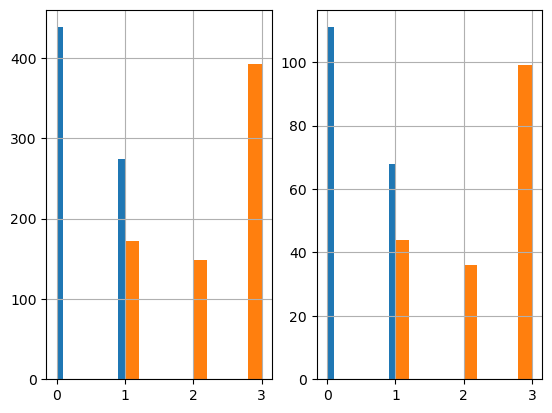

In [73]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()


In [74]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 290 to 863
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [75]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer (BaseEstimator, TransformerMixin):
    def fit(self, X ,Y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [76]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C", "S", "Q", "N"]
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
            
        matrix=encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female","Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
                
            return X
            

In [77]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit (self, X, Y=None):
        return self
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")
    

In [78]:
from sklearn.pipeline import Pipeline 
pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [79]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [80]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female
290,291,1,1,26.00000,0,0,78.8500,0.0,0.0,1.0,1.0
430,431,1,1,28.00000,0,0,26.5500,0.0,0.0,1.0,0.0
54,55,0,1,65.00000,0,1,61.9792,1.0,0.0,0.0,0.0
690,691,1,1,31.00000,1,0,57.0000,0.0,0.0,1.0,0.0
366,367,1,1,60.00000,1,0,75.2500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
213,214,0,2,30.00000,0,0,13.0000,0.0,0.0,1.0,0.0
239,240,0,2,33.00000,0,0,12.2750,0.0,0.0,1.0,0.0
341,342,1,1,24.00000,3,2,263.0000,0.0,0.0,1.0,1.0
619,620,0,2,26.00000,0,0,10.5000,0.0,0.0,1.0,0.0


In [81]:
strat_train_set.info 

<bound method DataFrame.info of      PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare    C  \
290          291         1       1  26.00000      0      0   78.8500  0.0   
430          431         1       1  28.00000      0      0   26.5500  0.0   
54            55         0       1  65.00000      0      1   61.9792  1.0   
690          691         1       1  31.00000      1      0   57.0000  0.0   
366          367         1       1  60.00000      1      0   75.2500  1.0   
..           ...       ...     ...       ...    ...    ...       ...  ...   
213          214         0       2  30.00000      0      0   13.0000  0.0   
239          240         0       2  33.00000      0      0   12.2750  0.0   
341          342         1       1  24.00000      3      2  263.0000  0.0   
619          620         0       2  26.00000      0      0   10.5000  0.0   
863          864         0       3  29.74637      8      2   69.5500  0.0   

       S    Q  Female  
290  0.0  1.0     1

In [82]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
Y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scalar.fit_transform(X)
Y_data = Y.to_numpy()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy",return_train_score=True)
grid_search.fit(X_data, Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [91]:
final_clf = grid_search.best_estimator_

In [92]:
final_clf

RandomForestClassifier(max_depth=10, n_estimators=200)

In [93]:
RandomForestClassifier(max_depth=5, n_estimators=500)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [94]:
strat_test_set = pipeline.fit_transform(strat_test_set)

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [ ]:
X_test = strat_test_set.drop(['Survived'], axis=1)
Y_test = strat_test_set['Survived']

scalar = StandardScaler()
X_data_test = scalar.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()

In [31]:
final_clf.score(X_data_test, Y_data_test)

0.8435754189944135

In [ ]:
final_data = pipeline.fit_transform(titanic_data)


In [ ]:
final_data

In [ ]:
X_final = final_data.drop(['Survived'], axis=1)
Y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()


In [ ]:
prod_clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10,100,200,500], "max_depth": [None, 5, 10], "min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, Y_data_final)

In [ ]:
GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring="accuracy")

In [ ]:
prod_final_clf = grid_search.best_estimator_


In [ ]:
zip_path="C:/Users/siddh/Downloads/titanic.zip"
with zipfile.ZipFile(zip_path,'r')as zip_file:
    csv_file=zip_file.extract("test.csv",path="C:/Users/siddh/Downloads/")
    titanic_test_data=pd.read_csv(csv_file)

In [ ]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [ ]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")


scaler = StandardScaler()
X_data_final_test = scalar.fit_transform(X_final_test)


In [ ]:
predictions = prod_final_clf.predict(X_final_test)

In [ ]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv(r"C:\Users\siddh\Downloads\titanic.zip\predictions.csv", index=False)

In [51]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
